In [ ]:
#Copyright (c) 2017 Eric Karr
#Software is licensed under the MIT License
#complete license can be found at https://github.com/karreric1/rms/

In [1]:
import numpy as np
import pandas as pd
import decimal
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
#file milker_functions.py must be in the same directory as this notebook
from milker_functions import *

In [3]:
#baseline simulation
#single robot running
# lambda = 500, mu = 300, sigma = 100
#duration = 10 days = 864000 seconds
exps = exp_generator(30000, 300)
arrivals = time_totalizer(exps)
services = norm_generator(30000, 300, 100)
times, total_customers, customers, service_durations, d1, dt2, oc1, oc2, cc= parallel_milker(arrivals, services, 0, 0, 2, 864000, [7200, 7200], 1800)


2


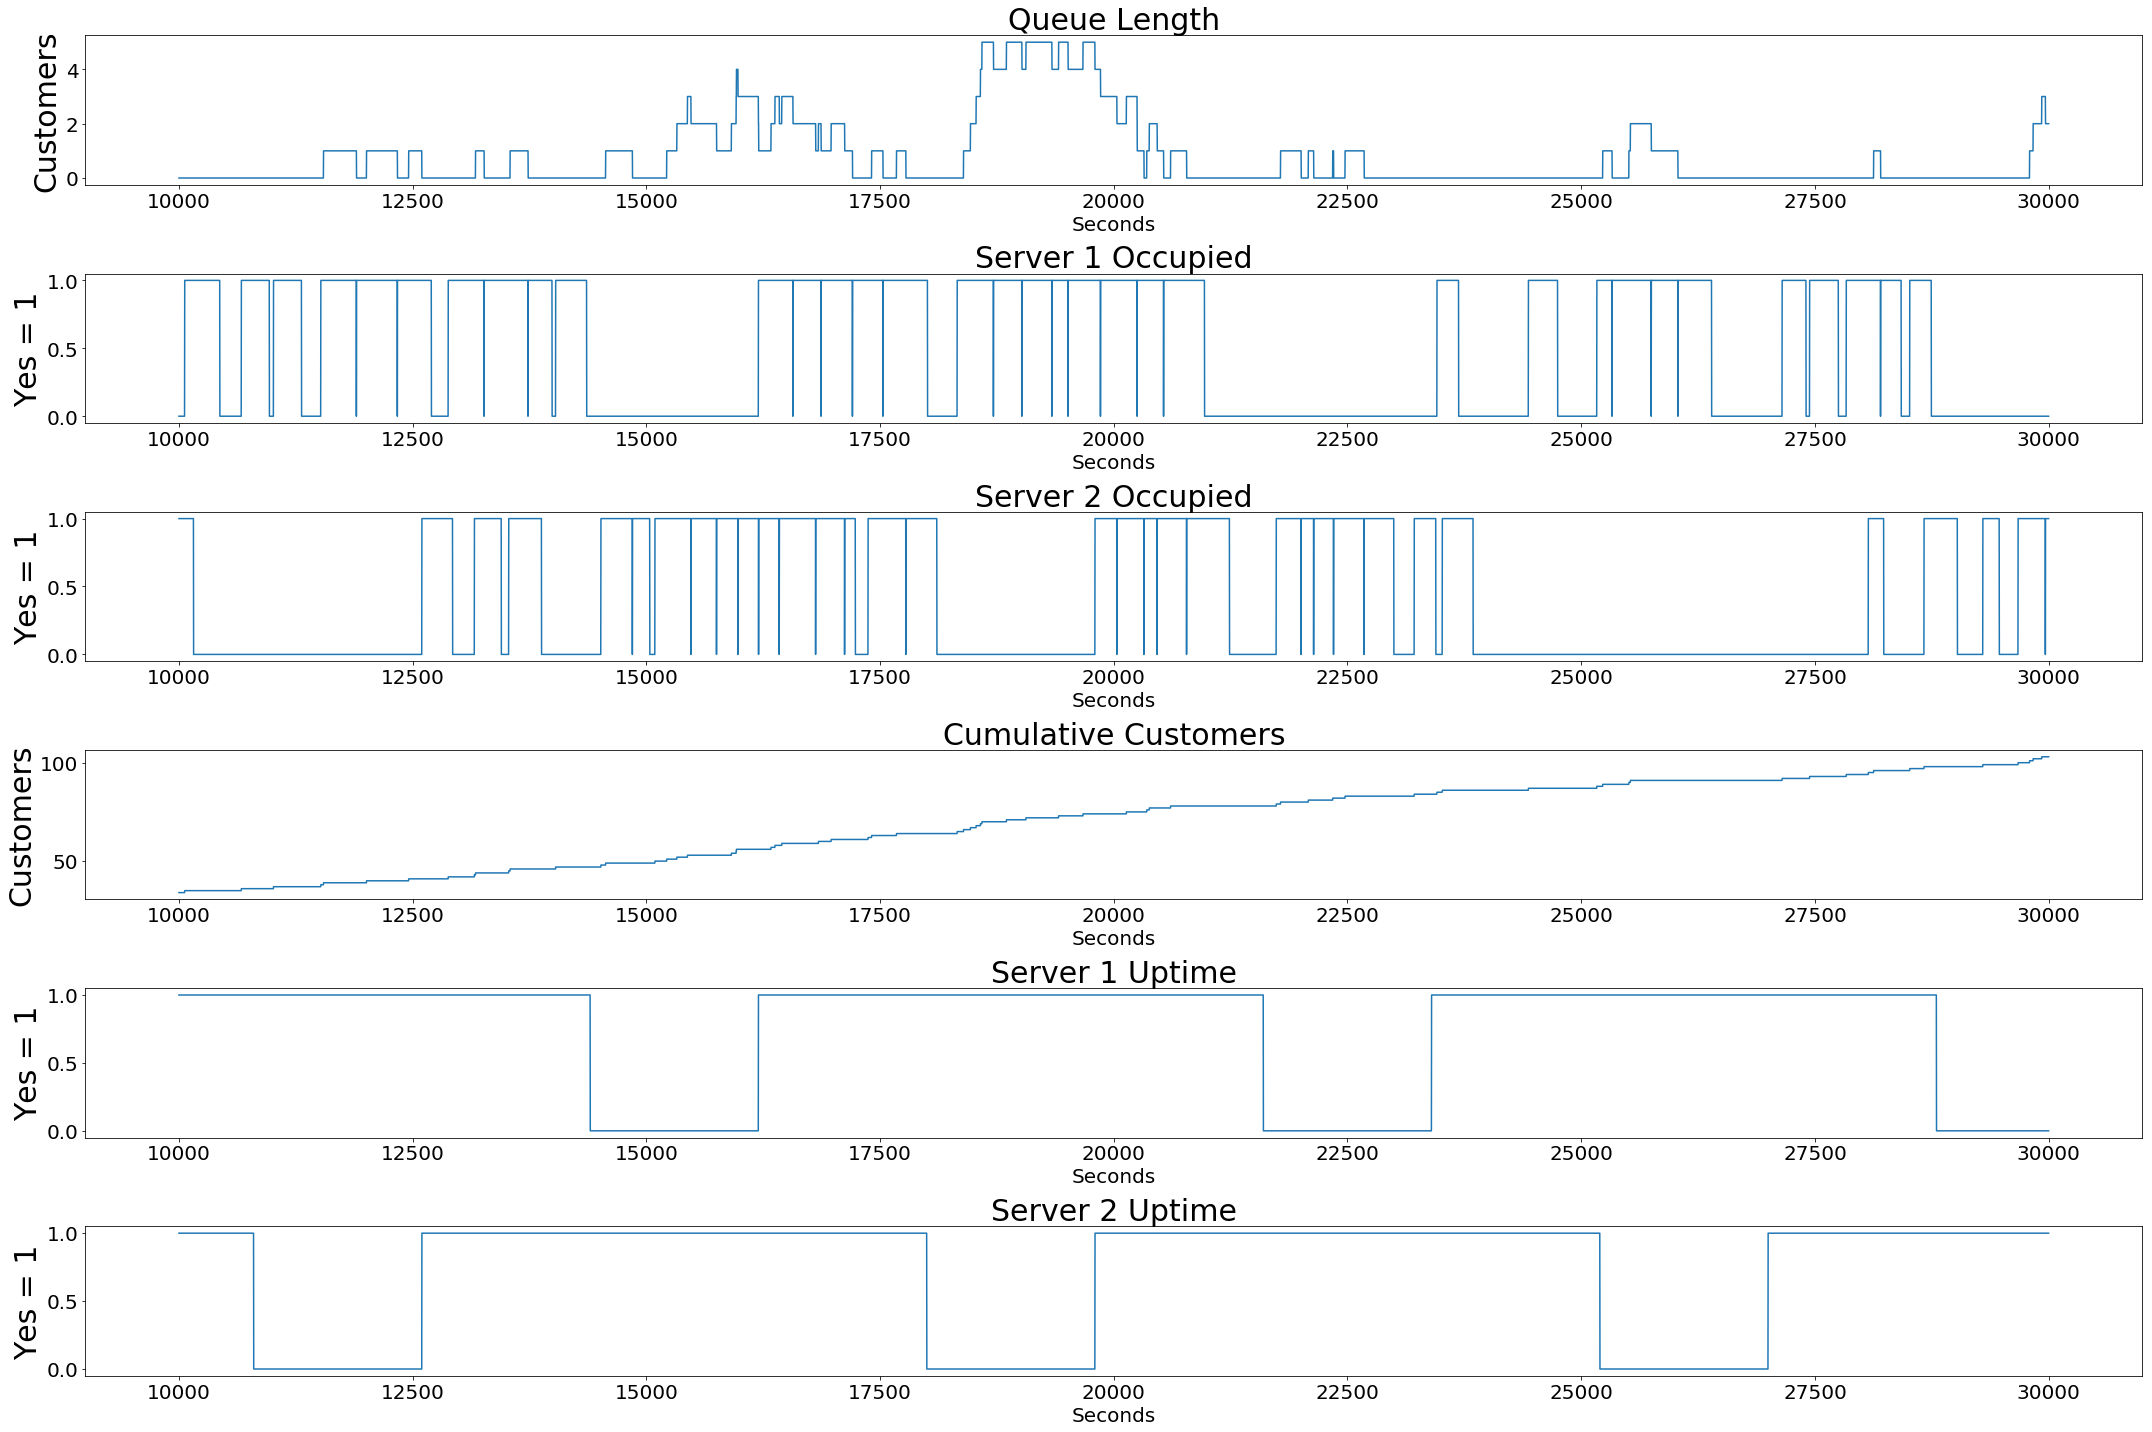

In [4]:
start_time = 10000
end_time = 30000
fig1 = plt.figure(figsize = (30,20))
fig1_iterator = 1
#plt.tight_layout()

for items in [[customers, 'Queue Length', 'Customers'], [oc1, 'Server 1 Occupied', 'Yes = 1'], 
              [oc2, 'Server 2 Occupied', 'Yes = 1'], [cc, 'Cumulative Customers', 'Customers'],
             [d1, 'Server 1 Uptime', 'Yes = 1'], [dt2, 'Server 2 Uptime', 'Yes = 1']]:
    ax_val = fig1.add_subplot(6,1, fig1_iterator)
    ax_val.plot(times[start_time:end_time], items[0][start_time:end_time])
    ax_val.set_title(items[1], fontsize=30)
    ax_val.set_xlabel('Seconds', fontsize=20)
    ax_val.set_ylabel(items[2], fontsize=30)
    ax_val.tick_params(axis='both', labelsize = 20)
    fig1_iterator += 1
plt.tight_layout()

In [5]:
#perform a long-run simulation of parlor with parallel server, periodic maintenance
#4,320,000 seconds equals 50 days run-time
#run 11 simulations with varying mean arrivals
lambda_list = [325, 300, 250, 212, 200, 195, 190, 185, 180, 175, 170]
service_dist = [300, 100] #mean and standard deviation of service time
total_customers_list = []
customers_list = []
dt1_list = []
dt2_list = []
oc1_list = []
oc2_list = []
cc_list = []
for i in lambda_list:
    exps = exp_generator(30000, i)
    arrivals = time_totalizer(exps)
    services = norm_generator(30000, service_dist[0], service_dist[1])
    times, total_customers, customers, service_durations, dt1, dt2, oc1, oc2, cc= parallel_milker(arrivals, services, 0, 0, 2, 1864000,[7200, 7200] , 1800)
    total_customers_list.append(total_customers)
    customers_list.append(customers)
    dt1_list.append(dt1) #downtime
    dt2_list.append(dt2)
    oc1_list.append(oc1) #occupancy
    oc2_list.append(oc2)
    cc_list.append(cc) #cumulative customers

2
2
2
2
2
2
2
2
2
2
2


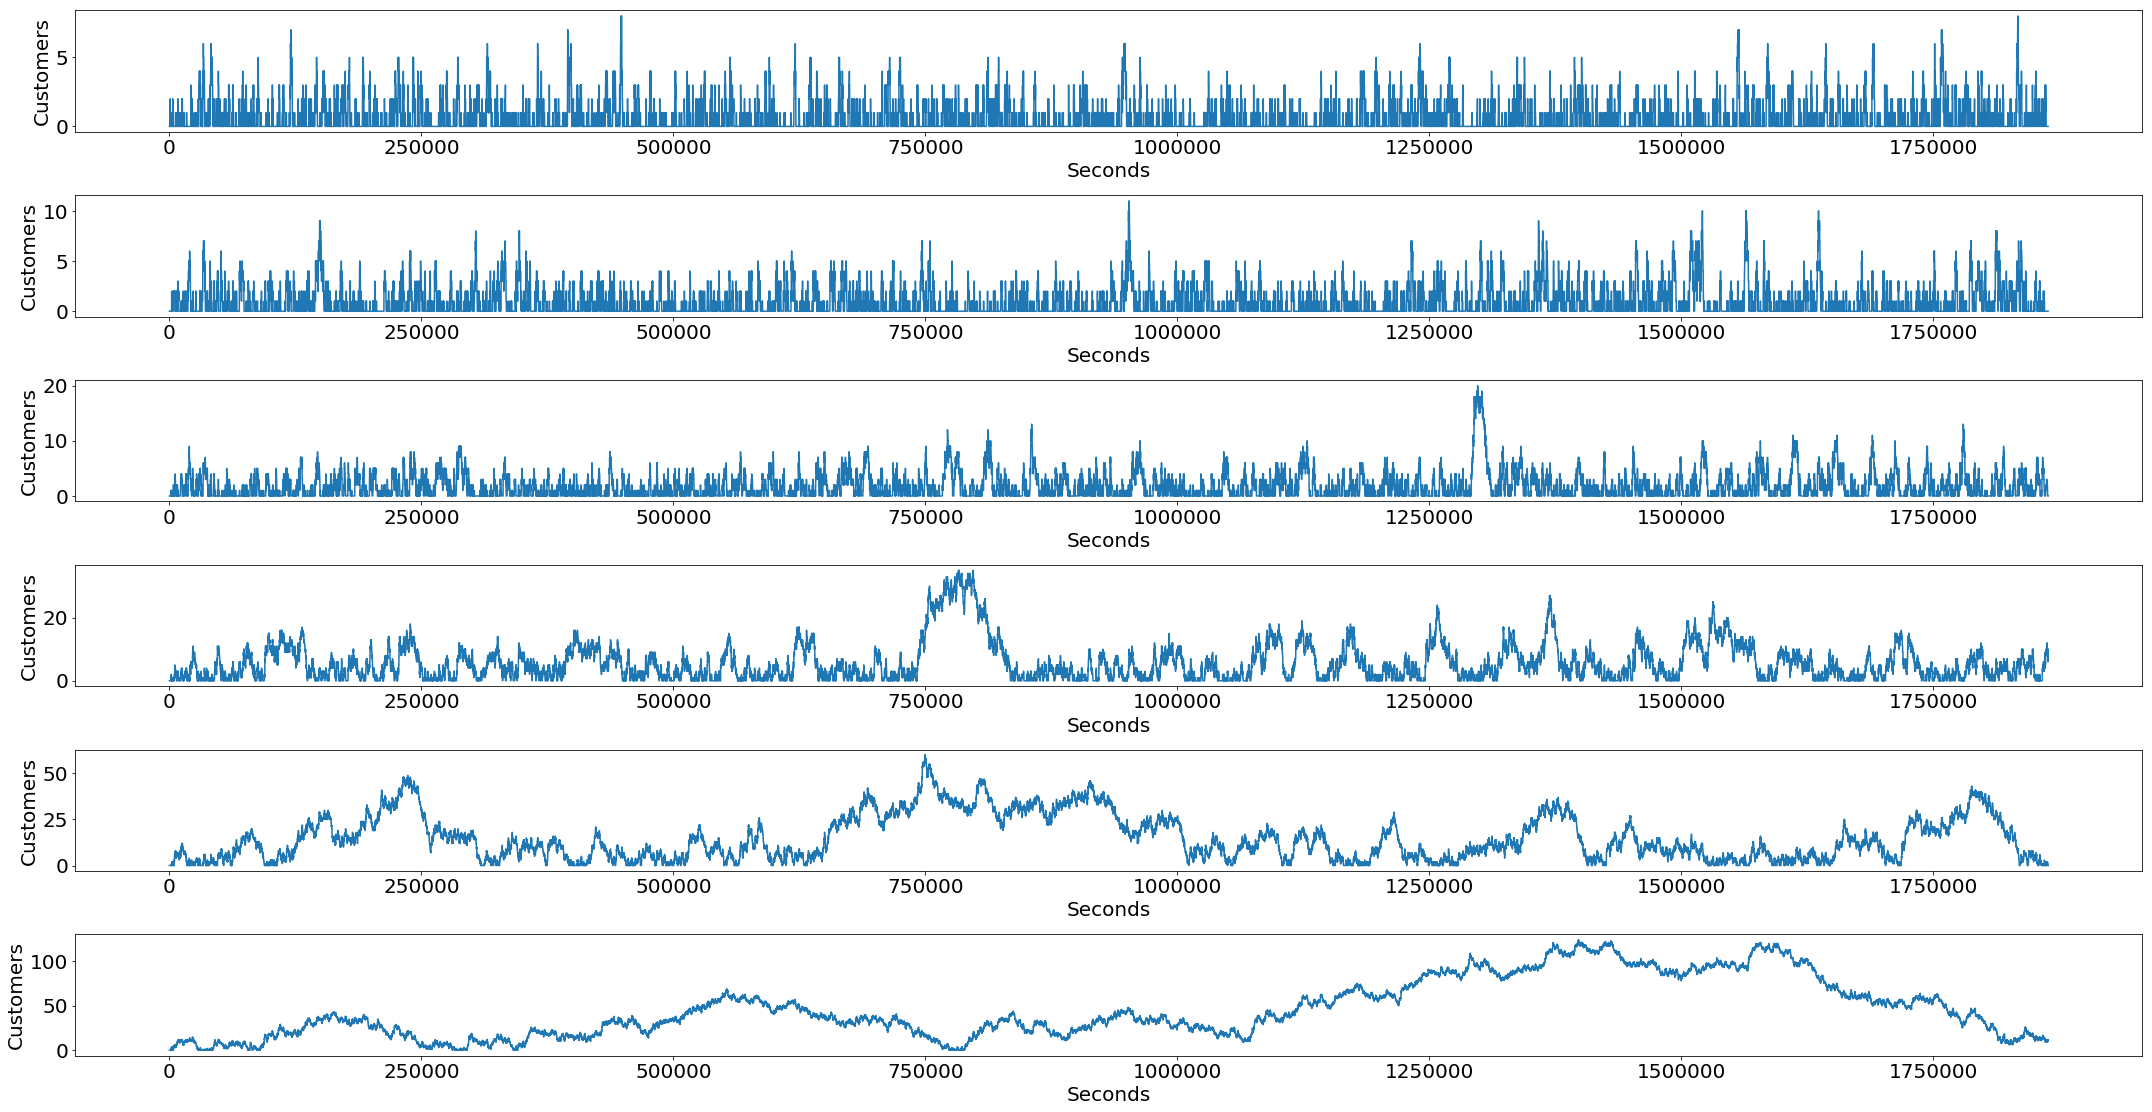

In [6]:
#plot results of varying inter-arrival times
start_time = 0
end_time = -1
fig1 = plt.figure(figsize = (30,20))
fig1_iterator = 1

for item in customers_list[0:6]:#this for loop generates subplots for each run
    #ax_val = 'a'#'ax' + _ + item
    ax_val = fig1.add_subplot(8,1, fig1_iterator)
    ax_val.plot(times[start_time:end_time], item[start_time:end_time])
    ax_val.set_ylabel('Customers', fontsize=20)
    ax_val.tick_params(axis='both', labelsize = 20)
    ax_val.set_xlabel('Seconds', fontsize=20)
    fig1_iterator += 1
plt.tight_layout()

In [7]:
#calculate max and mean queue lengths for each run
mean_q_len = [] #mean queue length for each run
max_q_len = [] # maximum queue length for each run
for i in customers_list:
    current_mean = np.mean(i)
    current_max = np.max(i)
    mean_q_len.append(current_mean)
    max_q_len.append(current_max)
    current_samples = len(i)
    threshold_counter = 0 #counter for number of seconds above 8 in queue
    for item in i:
        if item > 8:
            threshold_counter += 1
            


In [8]:
#create dataframe for plotting queue length vs. arrival rate
lengths_df = pd.DataFrame(lambda_list, columns = ['ii_time', ])
lengths_df['queue_length'] = mean_q_len
lengths_df['arrival_rate'] = 1/lengths_df.ii_time #convert inter-arrival times to arrival rate

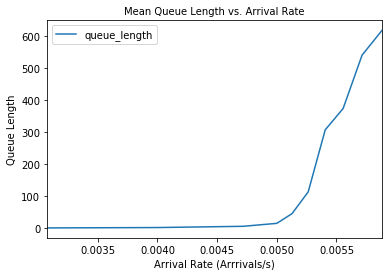

In [9]:
#plot queue length vs. arrival rate
ax = lengths_df.plot('arrival_rate', 'queue_length')
ax.set_xlabel('Arrival Rate (Arrrivals/s)', fontsize = 10)
ax.set_ylabel('Queue Length', fontsize = 10)
ax.set_title('Mean Queue Length vs. Arrival Rate', fontsize = 10)